In [475]:
%matplotlib notebook 

import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [476]:
DOWNLOAD_ROOT = "https://github.com/johnwheeler/handson-ml/tree/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [477]:
#def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
#    if not os.path.isdir(housing_path):
#        os.makedirs(housing_path)
#    tgz_path = os.path.join(housing_path, "housing.tgz")
#    urllib.request.urlretrieve(housing_url, tgz_path)
#    housing_tgz = tarfile.open(tgz_path)
#    housing_tgz.extractall(path = housing_path)
#    housing.tgz.close()

In [478]:
#def load_housing_data(housing_path = HOUSING_PATH):
#    csv_path = os.path.join(housing_path, "housing.tgz")
#    return pd.read_csv(csv_path)

In [479]:
housing = pd.read_csv("./datasets/housing/housing.csv")

In [480]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [481]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [482]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [483]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>


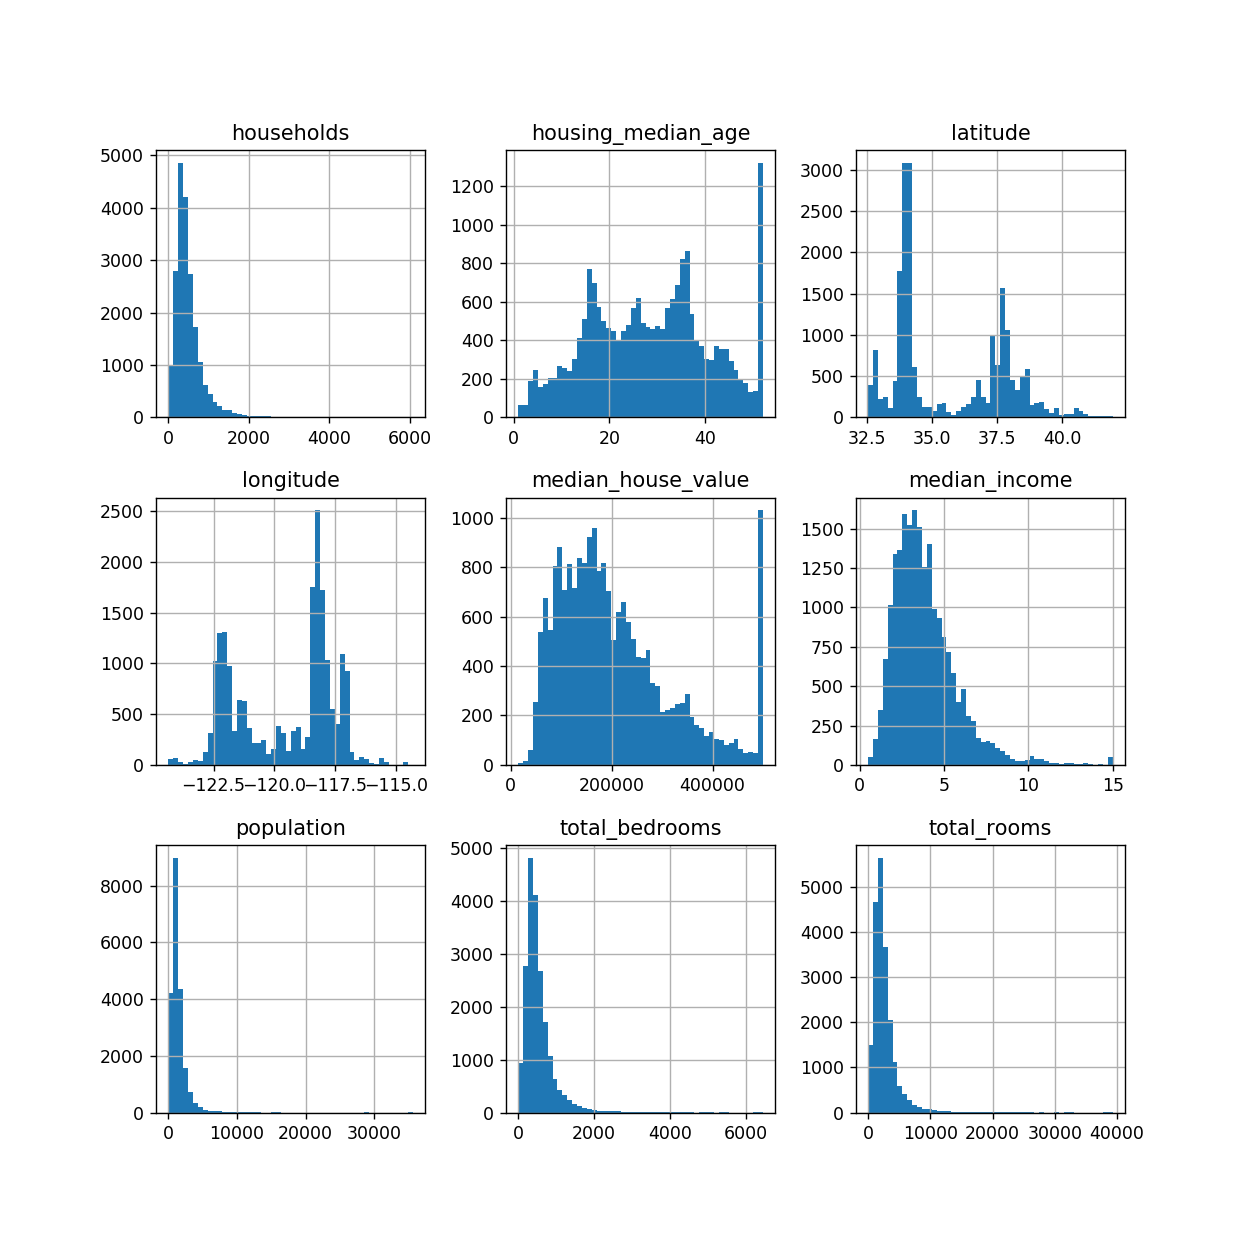

In [484]:
#changed from matplotlib inline
housing.hist(bins = 50, figsize=(10,10))# if you call hist function on entire dataset, it plots hists for all 
plt.show()

In [485]:
#here we insert an index to data - unique identifier
#then we hash the index - use last byte of hash (256) -if byte < 51, make it a test set (~20%)

import hashlib

def test_set_check(identifier, test_ratio, hash): #
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [486]:
housing_with_id = housing.reset_index() #add index column
train_set, test_set = split_train_test_by_id(housing_with_id, .2, 'index')

In [487]:
test_set.info()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4278 entries, 4 to 20637
Data columns (total 11 columns):
index                 4278 non-null int64
longitude             4278 non-null float64
latitude              4278 non-null float64
housing_median_age    4278 non-null float64
total_rooms           4278 non-null float64
total_bedrooms        4238 non-null float64
population            4278 non-null float64
households            4278 non-null float64
median_income         4278 non-null float64
median_house_value    4278 non-null float64
ocean_proximity       4278 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 401.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16362 entries, 0 to 20639
Data columns (total 11 columns):
index                 16362 non-null int64
longitude             16362 non-null float64
latitude              16362 non-null float64
housing_median_age    16362 non-null float64
total_rooms           16362 non-null float64
total_bedrooms 

# stratified sampling

In [488]:
#create income category - - divide median by 1.5 - round up using ceil
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [489]:
#do startified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = .2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [490]:
housing['income_cat'].value_counts() / len(housing) #income cat proportions in entire dataset
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis = 1, inplace=True)# get rid of 'income_cat' in both sets

In [491]:
#Discover/Visualize the Data
housing = strat_train_set.copy()

<IPython.core.display.Javascript object>


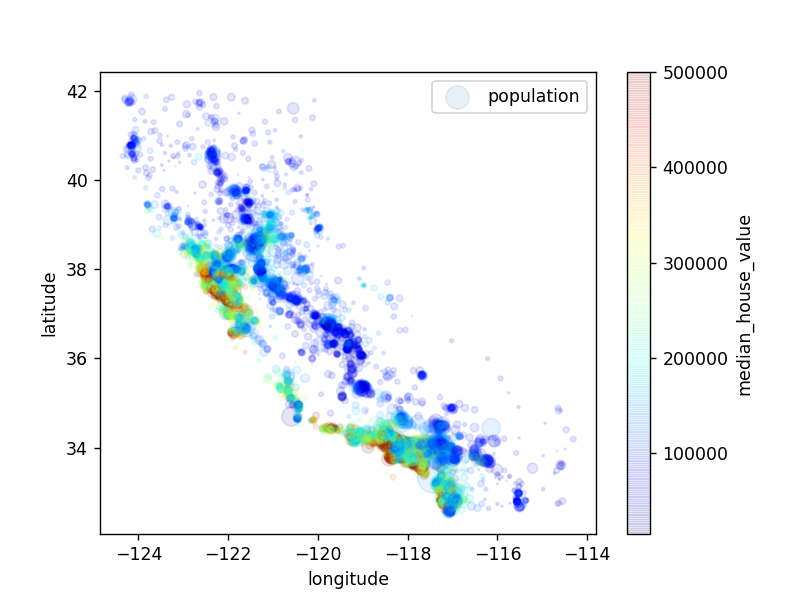

In [492]:
# alpha to see the high density areas
# radius of circle = population = option 's'
# color represents price = option 'c'
# cmap - predefined color map ranging from blue to red

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1,
            s = housing['population']/100, label = 'population',
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True
            )
plt.legend()

<IPython.core.display.Javascript object>


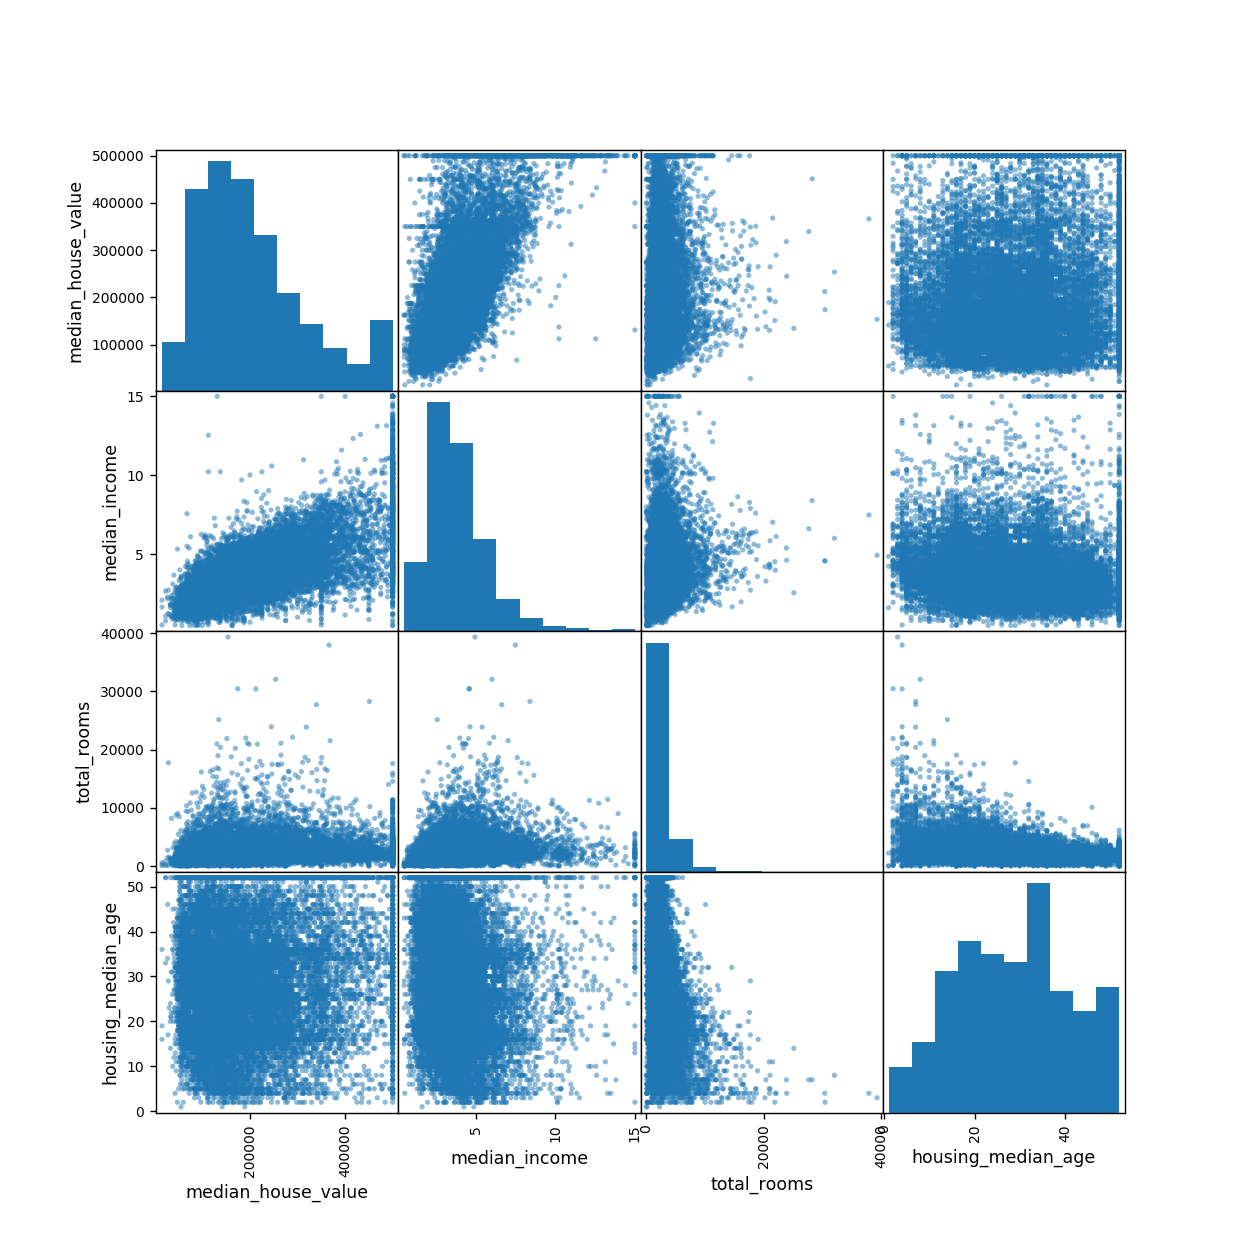

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002524340CA20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000252474F0780>]], dtype=object)

In [493]:
#compute correlation between all possible pairs of attributes
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) # how each attribute correlates with median house value
#we can use pandas scatter_matrix function - plots every attribute against all others 
# let's pick the most promising ones though
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(10,10))
#if variable is plotetd against itself, pandas just displays a histogram

<IPython.core.display.Javascript object>


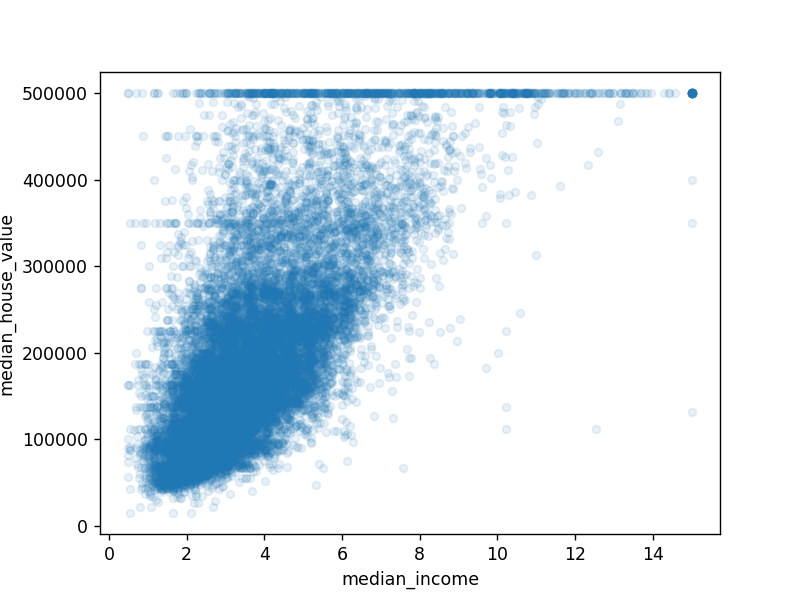

In [494]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = .1)

In [495]:
#adding a few other attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [496]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare Data for ML Algorithms:

In [497]:
#usually you should write functions for data cleanup: reuse - rebuild reasons
#let's separate predictors and labels - values we want to predict
housing = strat_train_set.drop('median_house_value', axis = 1) #drop function creates a copy - leave origninal untouched
housing_labels = strat_train_set['median_house_value'].copy() # keeps index, and values defined - series object

In [498]:
#create a few functions to deal with missing features  -sensitive to ML algortims
#total bedrooms attribute has some missing values
housing[housing['total_bedrooms'].isnull()] # access all ros where total bedroooms is null
#what to do? - get rid of rows - get rid of entire feature - replace with some other values (median e.g.)
#scikit learn has  anice feature oto replce all NaN with median of its feature - Imputer class

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median') #creat instance of imputer
#sinc we have nonunumerical values in the DF, get rif of ocean proximity for now - to get the median
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num) # computes median of each feature - stores in statistics_ instance variables

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [499]:
imputer.statistics_ # apply imputer to all numerica attributes just in case (ensure there are no NaNs)

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [500]:
housing_num.median().values # make sure these both align

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [501]:
X = imputer.transform(housing_num) #array of transformed features

In [502]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns) # insert X into a PD, using columns 

In [503]:
#now need to transform text variable to numeric - ocean proximity to numeric attribute
#can use scikit-learn transformer for this - LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity'] #index and ocean proximity
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
#look at the mapping done by the encoder in the clasees_attribute
print(encoder.classes_) #first one is mapped to 0, 2nd is mapped to 1 etc.

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [504]:
#however, the problem here is near_ocean = 4 -- implying far away from 0, which is not the case
#better to use one-hot encoding i.e. if category is 1, it is ON, ELSE IT IS 0!
#scikit-learn provides OneHotEncoder - encoder to convert integer categories into one-hot vectors
#fit-transform expects a 2D array
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #stores only nonzero elements, sparse matrix
housing_cat_1hot.toarray() #convert it to dense numpy array 

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [505]:
#to convert in one step -> text -> numeric -> one-hot use LabelBinarizer calss
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot #numpy array by default -> you can get sparse matrix by passsing sparse_output = True to LabelBinarizer class

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Feature Scaling 

In [ ]:
#two common ways -> min-max scaling(normalization) and standardization
#normalization -> values are shifted and rescaled so that they range from 0 to 1 -> MinMaxScaler 
#standardization -> subtract mean and divide by variance -> much less affected by outliers -> StandardScaler
#make sure to fit scalers to training data only

In [507]:
#Transformation Pipelines -> set of transformation steps 
#an example of small transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('imputer', Imputer(strategy='median')),
            ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
#impute median values
#add attributes
#scale to standard

NameError: name 'CombinedAttributesAdder' is not defined

In [ ]:
#pipeline constructor takes a list of sequential steps
#all but the last estimator must be transformers 0> (must have fit_transform method)
#when ou call pipeline's fit methods -> calls fit_trasform sequentially on all transformers until reaching final estimator 

In [509]:
#create a pipeine that takes care of text values as well -> need to join these pipeline using FeatureUnuion feature 

from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num) # list of columns
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder())
    
    
    
])

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']